![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

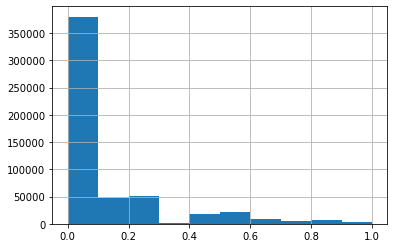

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

vect_A = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_dtm_A = vect_A.fit_transform(X_train)

modeloA = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = 10,
            criterion    = 'mse',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )
modeloA.fit(X_train_dtm_A, y_train)

X_test_dtm_A = vect_A.transform(X_test)
prediccionesA = modeloA.predict(X_test_dtm_A)

mse1 = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediccionesA,
        squared = False
       )
print(f"Caracteristicas: {X_train_dtm_A.shape[1]}")
print(f"El error (rmse) de test es: {mse1}")

Caracteristicas: 72931
El error (rmse) de test es: 0.17598610305301485


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 2
vect_B = CountVectorizer(stop_words='english', ngram_range=(1, 3))
X_train_dtm_B = vect_B.fit_transform(X_train)

modeloB = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = 10,
            criterion    = 'mse',
            max_features = 100,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )
modeloB.fit(X_train_dtm_B, y_train)

X_test_dtm_B = vect_B.transform(X_test)
prediccionesB = modeloB.predict(X_test_dtm_B)

mse2 = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediccionesB,
        squared = False
       )
print(f"Caracteristicas: {X_train_dtm_B.shape[1]}")
print(f"El error (rmse) de test es: {mse2}")

Caracteristicas: 12512259
El error (rmse) de test es: 0.1975599013904297


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
TF-IDF es una abreviacion de Term Frequency Inverse Document Frequency. Este es un algoritmo muy comun para transformar texto en una representacion de la importancia de las palabras en numeros.
Este algoritmo pondera el uso de una determinada palabra dentro de un documento y supone por lo tanto un elemento importante y relevante para la clasificación de documentos. El valor de importancia de una palabra en un documento se calcula con la siguiente expresion: TF*IDF, donde:

TF: Frecuencia de términos
La frecuencia de una palabra determinada en un documento, es sencillamente la cantidad de veces que aparece dicha palabra en el documento sobre la cantidad total de palabras en el documento.
TF = Numero total de la palabra en el documento / Numero total de palabras en el documento

IDF: Frecuencia inversa de documento
Disminuye el peso de aquéllas palabras que se repiten mucho en el total de los documentos y le otorga mayor valor a esas palabras menos frecuentes.
DF = Numero total de documentos / Numero total de documentos con la palabra

La principal diferencia entre CountVectorizer y TfidfVectorizer es que CountVectorizer solo cuenta cuántas veces aparece cada palabra en un documento, mientras que TfidfVectorizer también tiene en cuenta cuán común o rara es esa palabra en todos los documentos.

Algunas ventajas y desventajas de usar TfidfVectorizer son:

Puede ayudar a reducir el impacto de las palabras comunes que no son muy informativas como “el”, “la”, “de”
Resaltar las palabras importantes que son específicas de cada documento.
Puede ser más lento y requerir más memoria que CountVectorizer.
Puede no ser adecuado para todas las aplicaciones, ya que a veces la frecuencia bruta de las palabras puede ser más importante que su importancia relativa.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
X_train_tfidf  = tfidfvectorizer.fit_transform(X_train)

modeloC = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = 10,
            criterion    = 'mse',
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )
modeloC.fit(X_train_tfidf, y_train)

X_test_tfidf = tfidfvectorizer.transform(X_test)
prediccionesC = modeloC.predict(X_test_tfidf)

mse3 = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediccionesC,
        squared = False
       )
print(f"Caracteristicas: {X_train_tfidf.shape[1]}")
print(f"El error (rmse) de test es: {mse3}")

Caracteristicas: 140862
El error (rmse) de test es: 0.17485175083887516


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

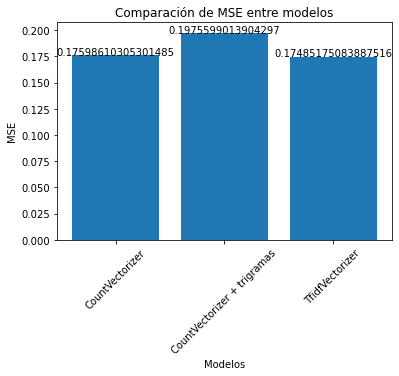

In [13]:
# Celda 5

mse_values = [mse1, mse2, mse3]
model_names = ['CountVectorizer', 'CountVectorizer + trigramas', 'TfidfVectorizer']

import matplotlib.pyplot as plt

plt.bar(model_names, mse_values)
for i in range(len(model_names)):
    plt.text(i, mse_values[i], str(mse_values[i]), ha='center')
plt.xlabel('Modelos')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos')
plt.xticks(rotation=45)
plt.show()



Al evaluar el desempeño de los 3 modelos por su MSE, vemos que el modelo que utilizó TfidfVectorizer obtuvo el MSE más bajo, 
lo que sugiere que este preprocesamiento de texto fue más efectivo para capturar las características relevantes del conjunto
de datos y reducir el error de predicción.

La elección de la técnica de preprocesamiento de texto depende de la naturaleza del problema y del conjunto de datos en sí. 
Por ejemplo se puede usar CountVectorizer para conjuntos de datos en los que se quiera identificar las palabras más comunes
y evitar que las palabras más frecuentes dominen las características del modelo. TfidfVectorizer puede ser más útil cuando 
se quiera dar más peso a las palabras menos frecuentes pero importantes en todo el conjunto de documentos. CountVectorizer
con trigramas puede ser útil para capturar secuencias de tres palabras significativas en el texto. 

En conclusión, es importante evaluar varias posibilidades a la hora de escoger una forma de procesar los datos.